# AI ML PROJECT 
## Problem Statement - Classification Problem
#### The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data.
#### There is a dataset given which contains the information of various users obtained from the social networking sites. There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car.
#### For this problem, we will build a Machine Learning model. We will predict the purchased variable (Dependent Variable) by using age and salary (Independent variables).

In [1]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns 

In [2]:
#importing dataset
df=pd.read_csv('User_Data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Data Preprocessing

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.values

array([[15624510, 'Male', 19, 19000, 0],
       [15810944, 'Male', 35, 20000, 0],
       [15668575, 'Female', 26, 43000, 0],
       ...,
       [15654296, 'Female', 50, 20000, 1],
       [15755018, 'Male', 36, 33000, 0],
       [15594041, 'Female', 49, 36000, 1]], dtype=object)

In [5]:
len(df)

400

In [6]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


### Dealing with Missing values

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.shape

(400, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Encoding

In [11]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

In [12]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [14]:
# Import label encoder          
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. used on ordinal data
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Gender'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [15]:
# Onehot Encoding - used on nominal data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [16]:
data = df.iloc[: ,1]
data

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [17]:
data = data.to_numpy()
data

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [18]:
data = data.reshape(400,1)
data

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [19]:
x1 = onehotencoder.fit_transform(data).toarray()
x1

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [20]:
OH_encoder = OneHotEncoder(sparse=False)#handle_unknown='ignore' , sparse ='false'
x1=df['Gender'].to_numpy().reshape(-1,1)

In [21]:
OH_cols_train=pd.DataFrame(OH_encoder.fit_transform(x1))# it will convert to dataframe

In [22]:
OH_cols_train

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [23]:
df=pd.concat([df,OH_cols_train], axis=1)#it is concatenat theri column

In [24]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,0,1
0,15624510,1,19,19000,0,0.0,1.0
1,15810944,1,35,20000,0,0.0,1.0
2,15668575,0,26,43000,0,1.0,0.0
3,15603246,0,27,57000,0,1.0,0.0
4,15804002,1,19,76000,0,0.0,1.0
...,...,...,...,...,...,...,...
395,15691863,0,46,41000,1,1.0,0.0
396,15706071,1,51,23000,1,0.0,1.0
397,15654296,0,50,20000,1,1.0,0.0
398,15755018,1,36,33000,0,0.0,1.0


In [25]:
df=df.rename(columns={1:"Male",0:"Female"})

In [26]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,1,19,19000,0,0.0,1.0
1,15810944,1,35,20000,0,0.0,1.0
2,15668575,0,26,43000,0,1.0,0.0
3,15603246,0,27,57000,0,1.0,0.0
4,15804002,1,19,76000,0,0.0,1.0
...,...,...,...,...,...,...,...
395,15691863,0,46,41000,1,1.0,0.0
396,15706071,1,51,23000,1,0.0,1.0
397,15654296,0,50,20000,1,1.0,0.0
398,15755018,1,36,33000,0,0.0,1.0


### Handling Outliers

In [27]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print("IQR: ",IQR)
print("Q1: ",Q1)
print("Q3: ",Q3)

IQR:  User ID            123599.25
Gender                  1.00
Age                    16.25
EstimatedSalary     45000.00
Purchased               1.00
Female                  1.00
Male                    1.00
dtype: float64
Q1:  User ID            15626763.75
Gender                    0.00
Age                      29.75
EstimatedSalary       43000.00
Purchased                 0.00
Female                    0.00
Male                      0.00
Name: 0.25, dtype: float64
Q3:  User ID            15750363.0
Gender                    1.0
Age                      46.0
EstimatedSalary       88000.0
Purchased                 1.0
Female                    1.0
Male                      1.0
Name: 0.75, dtype: float64


In [28]:
print("Upper Fence:  ",Q3+1.5*IQR)
print("Lower Fence:  ",Q1-1.5*IQR)
print("IQR:  ",IQR)

Upper Fence:   User ID            1.593576e+07
Gender             2.500000e+00
Age                7.037500e+01
EstimatedSalary    1.555000e+05
Purchased          2.500000e+00
Female             2.500000e+00
Male               2.500000e+00
dtype: float64
Lower Fence:   User ID            1.544136e+07
Gender            -1.500000e+00
Age                5.375000e+00
EstimatedSalary   -2.450000e+04
Purchased         -1.500000e+00
Female            -1.500000e+00
Male              -1.500000e+00
dtype: float64
IQR:   User ID            123599.25
Gender                  1.00
Age                    16.25
EstimatedSalary     45000.00
Purchased               1.00
Female                  1.00
Male                    1.00
dtype: float64


In [29]:
def total_outliers(X,Y):
    c=0
    for i in X:
        if i>Y:
            c=c+1
            
    print(c)  

In [30]:
total_outliers(df.EstimatedSalary,1.555000e+05)

0


In [31]:
total_outliers(df.Purchased,2.500000e+00)

0


#### The dataset is processed. Now we can apply machine learning algorithms to it.

### Splitting dataset into training and test set

In [32]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3) # 70% training and 30% test

### Feature Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

## Logistic Regression Algorithm
#### used for predicting the categorical dependent variable using a given set of independent variables

In [34]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [35]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [36]:
# Model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cnf_matrix)

Confusion Matrix:  [[74  6]
 [14 26]]


##### Accuracy

In [37]:
acc =  metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy(in %): " ,acc)    # ratio of the number of correctly classified cases to the total of cases under evaluation

Accuracy(in %):  83.33333333333334


#### we can interpret that 74+26= 100 (Correct Output) and 14+6= 20(Incorrect Output).

##### Precision

In [38]:
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1) #TP/TP+FP true positive/no of predicted positive
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0) #TN/TN+FN true negative/no of predicted negative
print("Precision Positive: " ,precision_positive)
print("Precision Negative: " ,precision_negative) 

Precision Positive:  0.8125
Precision Negative:  0.8409090909090909


##### Recall

In [39]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1) #TP/TP+FN true positive/no of actual positive
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0) #TN/TN+FP true negative/no of actual negative
print("Sensitivity: ",recall_sensitivity)  
print("Specificity: ",recall_specificity)

Sensitivity:  0.65
Specificity:  0.925


##### F1-score

In [40]:
#F1-score is the weighted average of recall and precision of the respective class.
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1) 
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=0)
print("f1 Positive: ",f1_positive) 
print("f1 Negative: ",f1_negative) 

f1 Positive:  0.7222222222222223
f1 Negative:  0.8809523809523809


##### Classification Report

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        80
           1       0.81      0.65      0.72        40

    accuracy                           0.83       120
   macro avg       0.83      0.79      0.80       120
weighted avg       0.83      0.83      0.83       120



Text(0.5, 257.44, 'Predicted label')

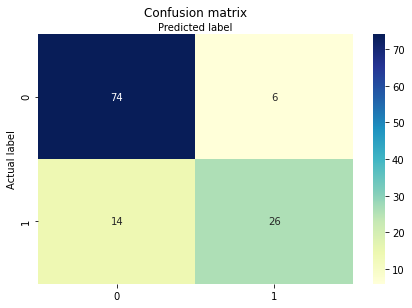

In [42]:
#Visualizing the training set result  
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### We have successfully visualized the training set result for the logistic regression, and our goal for this classification is to divide the users who purchased the SUV car and who did not purchase the car.

## K-Nearest Neighbor(KNN) Algorithm
#### KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [45]:
# Model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cnf_matrix)

Confusion Matrix:  [[70 10]
 [ 6 34]]


##### Accuracy

In [46]:
acc =  metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy(in %): " ,acc)

Accuracy(in %):  86.66666666666667


#### we can see there are 70+34= 104 correct predictions and 10+6= 16 incorrect predictions, whereas, in Logistic Regression, there were 11 incorrect predictions. So we can say that the performance of the model is improved by using the K-NN algorithm.

##### Precision

In [47]:
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1) #TP/TP+FP true positive/no of predicted positive
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0) #TN/TN+FN true negative/no of predicted negative
print("Precision Positive: " ,precision_positive)
print("Precision Negative: " ,precision_negative) 

Precision Positive:  0.7727272727272727
Precision Negative:  0.9210526315789473


##### Recall

In [48]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1) #TP/TP+FN true positive/no of actual positive
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0) #TN/TN+FP true negative/no of actual negative
print("Sensitivity: ",recall_sensitivity)  
print("Specificity: ",recall_specificity)

Sensitivity:  0.85
Specificity:  0.875


##### F1-Score

In [49]:
#F1-score is the weighted average of recall and precision of the respective class.
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1) 
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=0)
print("f1 Positive: ",f1_positive) 
print("f1 Negative: ",f1_negative) 

f1 Positive:  0.8095238095238095
f1 Negative:  0.8974358974358975


##### Classification Report

In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        80
           1       0.77      0.85      0.81        40

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.87      0.87      0.87       120



Text(0.5, 257.44, 'Predicted label')

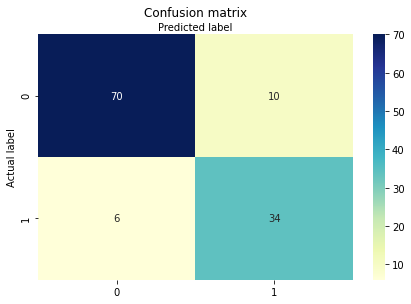

In [51]:
#Visualizing the training set result  
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Naïve Bayes Algorithm
#### Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. The Gaussian model assumes that features follow a normal distribution.

In [52]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [53]:
# making predictions on the testing set
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [54]:
# Model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cnf_matrix)

Confusion Matrix:  [[72  8]
 [ 9 31]]


##### Accuracy

In [55]:
acc =  metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy(in %): " ,acc)

Accuracy(in %):  85.83333333333333


#### As we can see in the above confusion matrix output, there are 9+8= 17 incorrect predictions, and 72+31=103 correct predictions.

##### Precision

In [56]:
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1) #TP/TP+FP true positive/no of predicted positive
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0) #TN/TN+FN true negative/no of predicted negative
print("Precision Positive: " ,precision_positive)
print("Precision Negative: " ,precision_negative) 

Precision Positive:  0.7948717948717948
Precision Negative:  0.8888888888888888


##### Recall

In [57]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1) #TP/TP+FN true positive/no of actual positive
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0) #TN/TN+FP true negative/no of actual negative
print("Sensitivity: ",recall_sensitivity)  
print("Specificity: ",recall_specificity)

Sensitivity:  0.775
Specificity:  0.9


##### F1-Score

In [58]:
#F1-score is the weighted average of recall and precision of the respective class.
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1) 
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=0)
print("f1 Positive: ",f1_positive) 
print("f1 Negative: ",f1_negative) 

f1 Positive:  0.7848101265822786
f1 Negative:  0.8944099378881988


##### Classification Report

In [59]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.79      0.78      0.78        40

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



Text(0.5, 257.44, 'Predicted label')

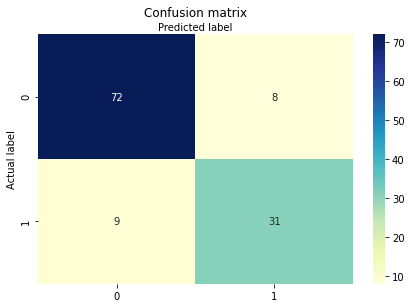

In [60]:
#Visualizing the training set result  
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Decision Tree Algorithm
#### It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [61]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier()

In [62]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [63]:
# Model evaluation using confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",cnf_matrix)

Confusion Matrix:  [[72  8]
 [ 9 31]]


##### Accuracy

In [64]:
acc =  metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy(in %): " ,acc)

Accuracy(in %):  85.83333333333333


#### we can see the confusion matrix, which has 8+9= 17 incorrect predictions and 72+31=103 correct predictions. 

##### Precision

In [65]:
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1) #TP/TP+FP true positive/no of predicted positive
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=0) #TN/TN+FN true negative/no of predicted negative
print("Precision Positive: " ,precision_positive)
print("Precision Negative: " ,precision_negative) 

Precision Positive:  0.7948717948717948
Precision Negative:  0.8888888888888888


##### Recall

In [66]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1) #TP/TP+FN true positive/no of actual positive
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=0) #TN/TN+FP true negative/no of actual negative
print("Sensitivity: ",recall_sensitivity)  
print("Specificity: ",recall_specificity)

Sensitivity:  0.775
Specificity:  0.9


##### F1-Score

In [67]:
#F1-score is the weighted average of recall and precision of the respective class.
f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1) 
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=0)
print("f1 Positive: ",f1_positive) 
print("f1 Negative: ",f1_negative) 

f1 Positive:  0.7848101265822786
f1 Negative:  0.8944099378881988


##### Classification Report

In [68]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.79      0.78      0.78        40

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



Text(0.5, 257.44, 'Predicted label')

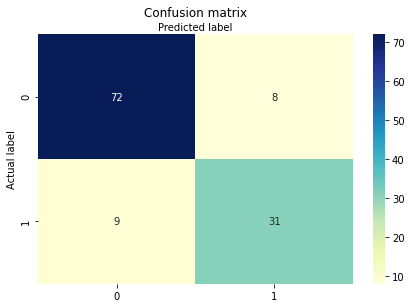

In [69]:
#Visualizing the training set result  
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Conclusion - Therefore, we can say that compared to other classification models, the K-NN classifier made a good prediction.